# DeepDive Walkthrough Tutorial performance results

**Current system configuration**
* 4 cores
* 64GB RAM
* data directory on internal 256GB SSD or on internal 1TB hard disk drive

## Memory status
* Ran `free -s 1 -t > "test_ram_"`date +%F_%H%M%S`".out"`

## CPU status
* monitoring visually with `htop`
* generally only 1 out of 4 cores used at any time, EXCEPT during inference portion (all 4 cores used)

## `deepdive run`
* **Run 1**
    * Data directory on internal 256GB SSD
        * wall time: 11:06:33 to 11:10:44 **(~4 min)**
        * memory status log: `test_ram_2016-01-15_110632.out`
        * summary:

                11:10:44 [profiler] INFO  --------------------------------------------------
                11:10:44 [profiler] INFO  Summary Report
                11:10:44 [profiler] INFO  --------------------------------------------------
                11:10:44 [profiler] INFO  ext_clear_table SUCCESS [12436 ms]
                11:10:44 [profiler] INFO  ext_people SUCCESS [3372 ms]
                11:10:44 [profiler] INFO  ext_has_spouse_candidates SUCCESS [65962 ms]
                11:10:44 [profiler] INFO  ext_has_spouse_features SUCCESS [40396 ms]
                11:10:44 [profiler] INFO  inference_grounding SUCCESS [101546 ms]
                11:10:44 [profiler] INFO  inference SUCCESS [23075 ms]
                11:10:44 [profiler] INFO  calibration plot written to /home/sandip/deepdive-0.7.1/app/spouse/run/20160115/110631.912536327/calibration/has_spouse.is_true.png [0 ms]
                11:10:44 [profiler] INFO  calibration SUCCESS [4234 ms]
                11:10:44 [profiler] INFO  --------------------------------------------------
* **Run 2**
    * Data directory on internal 1TB hard disk drive
        * wall time: 11:58:51 to 12:03:41 **(~5 min)**
        * memory status log: `test_ram_2016-01-15_115850.out`
        * summary:

                12:03:41 [profiler] INFO  --------------------------------------------------
                12:03:41 [profiler] INFO  Summary Report
                12:03:41 [profiler] INFO  --------------------------------------------------
                12:03:41 [profiler] INFO  ext_clear_table SUCCESS [20480 ms]
                12:03:41 [profiler] INFO  ext_people SUCCESS [3509 ms]
                12:03:41 [profiler] INFO  ext_has_spouse_candidates SUCCESS [67374 ms]
                12:03:41 [profiler] INFO  ext_has_spouse_features SUCCESS [44610 ms]
                12:03:41 [profiler] INFO  inference_grounding SUCCESS [126180 ms]
                12:03:41 [profiler] INFO  inference SUCCESS [24088 ms]
                12:03:41 [profiler] INFO  calibration plot written to /home/sandip/deepdive-0.7.1/app/spouse/run/20160115/115850.411982038/calibration/has_spouse.is_true.png [0 ms]
                12:03:41 [profiler] INFO  calibration SUCCESS [3803 ms]
                12:03:41 [profiler] INFO  --------------------------------------------------


In [1]:
!ls

011516_walkthrough_tutorial.ipynb  test_ram_2016-01-15_115850.out
test_ram_2016-01-15_110632.out


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn

seaborn.set()

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
!head test_ram_2016-01-15_110632.out

             total       used       free     shared    buffers     cached
Mem:      65922828    1129836   64792992      34300      62028     278420
-/+ buffers/cache:     789388   65133440
Swap:     33496060          0   33496060
Total:    99418888    1129836   98289052

             total       used       free     shared    buffers     cached
Mem:      65922828    1207588   64715240      37576      62056     297128
-/+ buffers/cache:     848404   65074424
Swap:     33496060          0   33496060


In [4]:
!tail test_ram_2016-01-15_110632.out

Mem:      65922828    3639844   62282984     164132      65340    2756900
-/+ buffers/cache:     817604   65105224
Swap:     33496060          0   33496060
Total:    99418888    3639844   95779044

             total       used       free     shared    buffers     cached
Mem:      65922828    3639812   62283016     164132      65340    2756900
-/+ buffers/cache:     817572   65105256
Swap:     33496060          0   33496060
Total:    99418888    3639812   95779076


In [5]:
from collections import OrderedDict

def get_mem_used_free(filename):
    
    ''' given an input mem test file, output a tuple of pandas series
        (mem_used, mem_free)
    '''

    with open(filename) as f:
        mem_lines = [line.rstrip('\n') for line in f.readlines() if line.startswith('Mem:')]

    mem_used = OrderedDict()
    mem_free = OrderedDict()

    for line_num, line in enumerate(mem_lines):
        mem_used_val, mem_free_val = [int(x) for x in line.split()[2:4]]
        mem_used[line_num] = mem_used_val
        mem_free[line_num] = mem_free_val

    return pd.Series(mem_used), pd.Series(mem_free)

In [6]:
df = pd.DataFrame()
df['run_1_mem_used'], df['run_1_mem_free'] = get_mem_used_free('test_ram_2016-01-15_110632.out')
df['run_1_mem_used_gb'] = df['run_1_mem_used']/(1024*1024)

df['run_2_mem_used'], df['run_2_mem_free'] = get_mem_used_free('test_ram_2016-01-15_115850.out')
df['run_2_mem_used_gb'] = df['run_2_mem_used']/(1024*1024)

df

,run_1_mem_used,run_1_mem_free,run_1_mem_used_gb,run_2_mem_used,run_2_mem_free,run_2_mem_used_gb
0,1129836,64792992,1.077496,5639836,60282992,5.378567
1,1207588,64715240,1.151646,5725136,60197692,5.459915
2,1474236,64448592,1.405941,5713420,60209408,5.448742
3,1880272,64042556,1.793167,5698928,60223900,5.434921
4,2313532,63609296,2.206356,5691856,60230972,5.428177
5,2433108,63489720,2.320393,5711992,60210836,5.447380
6,2498204,63424624,2.382473,5713044,60209784,5.448383
7,2558148,63364680,2.439640,5713632,60209196,5.448944
8,2627160,63295668,2.505455,5713932,60208896,5.449230
9,2691492,63231336,2.566807,5714008,60208820,5.449303


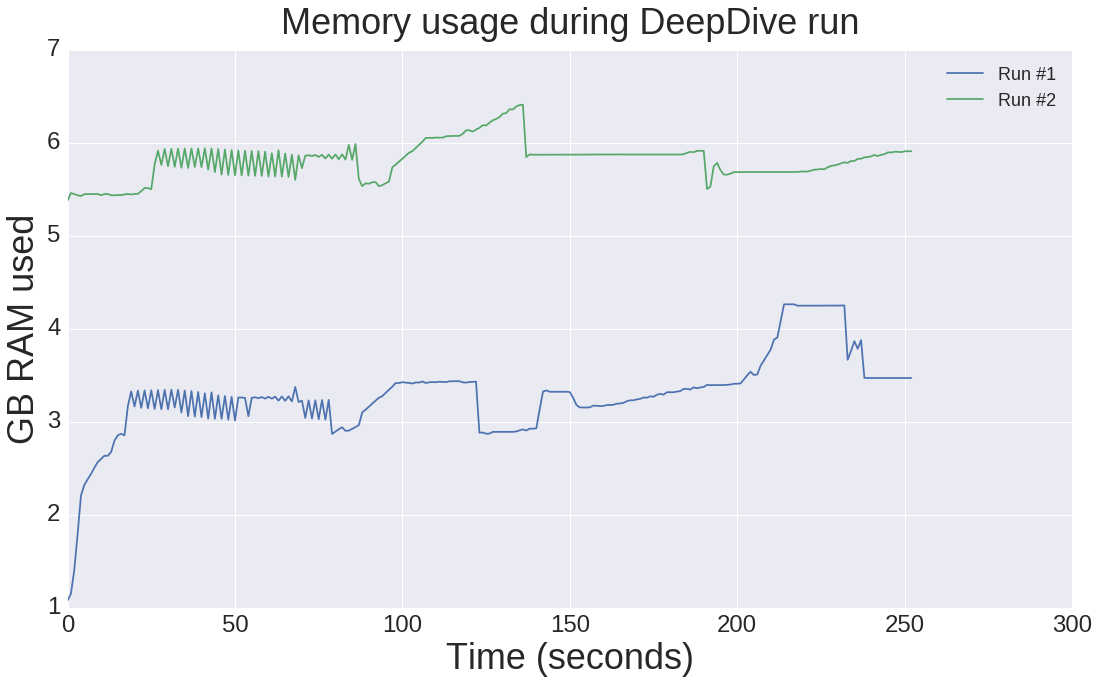

In [7]:
plt.figure(figsize=(18,10))
plt.plot(df.index, 'run_1_mem_used_gb', data=df, label='Run #1')
plt.plot(df.index, 'run_2_mem_used_gb', data=df, label='Run #2')
plt.title('Memory usage during DeepDive run', fontsize=36, y=1.02)
plt.xlabel('Time (seconds)', fontsize=36)
plt.ylabel('GB RAM used', fontsize=36)
plt.tick_params(labelsize=24, length=0)
plt.legend(fontsize=18)
plt.show()

------

### notes

* vary # features and data size, influence of these parameters on max/running memory usage and running CPU usage and overall time